In [1]:
####### Descriptive Analystics and Preproccessing ##############

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import datasets  
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler


from sklearn import tree


In [2]:
df = pd.read_csv('./dataset.csv')

In [3]:
### displaying the imported dataset

df.head()

Symbol Synonym Symbol                 Scientific Name with Author  \
0  ANISA            NaN                           Anisacanthus Nees   
1  ANTH2            NaN       Anisacanthus thurberi (Torr.) A. Gray   
2  ANTH2          DRTH3                      Drejera thurberi Torr.   
3  CALI2            NaN  Carlowrightia linearifolia (Torr.) A. Gray   
4  CALI2          SCLI9                Schaueria linearifolia Torr.   

           National Common Name       Family  
0            desert honeysuckle  Acanthaceae  
1  Thurber's desert honeysuckle  Acanthaceae  
2                           NaN  Acanthaceae  
3              heath wrightwort  Acanthaceae  
4                           NaN  Acanthaceae

In [4]:
### Checking the number of nan valued rows 
df.isna().sum()

Symbol                             0
Synonym Symbol                  6540
Scientific Name with Author        0
National Common Name           10293
Family                             0
dtype: int64

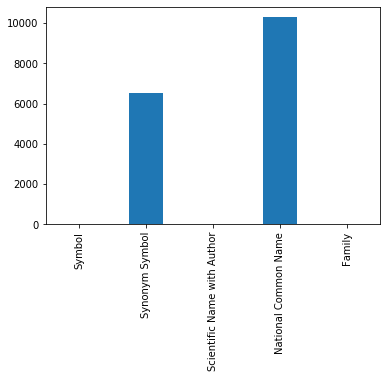

In [5]:
df.isnull().sum().plot.bar()

The above plot shows the no entry count in each column

In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df

symbol synonym_symbol  \
0      ANISA            NaN   
1      ANTH2            NaN   
2      ANTH2          DRTH3   
3      CALI2            NaN   
4      CALI2          SCLI9   
...      ...            ...   
16814  TRIBU            NaN   
16815   TRTE            NaN   
16816   ZYFA            NaN   
16817   ZYFA          ZYFAB   
16818  ZYGOP            NaN   

                             scientific_name_with_author  \
0                                      Anisacanthus Nees   
1                  Anisacanthus thurberi (Torr.) A. Gray   
2                                 Drejera thurberi Torr.   
3             Carlowrightia linearifolia (Torr.) A. Gray   
4                           Schaueria linearifolia Torr.   
...                                                  ...   
16814                                        Tribulus L.   
16815                             Tribulus terrestris L.   
16816                              Zygophyllum fabago L.   
16817  Zygophyllum fabago L. var. brachycarpum auct. ...   
16818                                     Zygophyllum L.   

               national_common_name          family  
0                desert honeysuckle     Acanthaceae  
1      Thurber's desert honeysuckle     Acanthaceae  
2                               NaN     Acanthaceae  
3                  heath wrightwort     Acanthaceae  
4                               NaN     Acanthaceae  
...                             ...             ...  
16814                  puncturevine  Zygophyllaceae  
16815                  puncturevine  Zygophyllaceae  
16816              Syrian beancaper  Zygophyllaceae  
16817                           NaN  Zygophyllaceae  
16818                     beancaper  Zygophyllaceae  

[16819 rows x 5 columns]


We see that having synonym_symbol poses as


In [7]:
Synonym_data = df[df["synonym_symbol"].notna()].drop(columns="symbol")

In [8]:
Synonym_data = Synonym_data.rename(columns={"synonym_symbol":"symbol"})

In [9]:
Synonym_data.isna().sum()

symbol                             0
scientific_name_with_author        0
national_common_name           10279
family                             0
dtype: int64

In [10]:
Synonym_data

symbol                        scientific_name_with_author  \
2       DRTH3                             Drejera thurberi Torr.   
4       SCLI9                       Schaueria linearifolia Torr.   
9       DIRE8                Diapedium resupinatum (Vahl) Kuntze   
10      DITO2              Diapedium torreyi (A. Gray) A. Heller   
11      DIPS2             Dicliptera pseudoverticillaris A. Gray   
...       ...                                                ...   
16807   LADI2                   Larrea divaricata auct. non Cav.   
16808   LADIT  Larrea divaricata Cav. ssp. tridentata (DC.) F...   
16809  LAGL11                           Larrea glutinosa Engelm.   
16810   LAME6                             Larrea mexicana Moric.   
16817   ZYFAB  Zygophyllum fabago L. var. brachycarpum auct. ...   

      national_common_name          family  
2                      NaN     Acanthaceae  
4                      NaN     Acanthaceae  
9                      NaN     Acanthaceae  
10                     NaN     Acanthaceae  
11                     NaN     Acanthaceae  
...                    ...             ...  
16807                  NaN  Zygophyllaceae  
16808                  NaN  Zygophyllaceae  
16809                  NaN  Zygophyllaceae  
16810                  NaN  Zygophyllaceae  
16817                  NaN  Zygophyllaceae  

[10279 rows x 4 columns]

In [11]:
print(10279 +16819) ### total augumented non empy symbols

27098


In [12]:
# df = df.drop(columns="synonym_symbol")


In [13]:
new_df= df.drop(columns="synonym_symbol").append(Synonym_data, ignore_index=True, sort = True)

In [14]:
new_df


family          national_common_name  \
0         Acanthaceae            desert honeysuckle   
1         Acanthaceae  Thurber's desert honeysuckle   
2         Acanthaceae                           NaN   
3         Acanthaceae              heath wrightwort   
4         Acanthaceae                           NaN   
...               ...                           ...   
27093  Zygophyllaceae                           NaN   
27094  Zygophyllaceae                           NaN   
27095  Zygophyllaceae                           NaN   
27096  Zygophyllaceae                           NaN   
27097  Zygophyllaceae                           NaN   

                             scientific_name_with_author  symbol  
0                                      Anisacanthus Nees   ANISA  
1                  Anisacanthus thurberi (Torr.) A. Gray   ANTH2  
2                                 Drejera thurberi Torr.   ANTH2  
3             Carlowrightia linearifolia (Torr.) A. Gray   CALI2  
4                           Schaueria linearifolia Torr.   CALI2  
...                                                  ...     ...  
27093                   Larrea divaricata auct. non Cav.   LADI2  
27094  Larrea divaricata Cav. ssp. tridentata (DC.) F...   LADIT  
27095                           Larrea glutinosa Engelm.  LAGL11  
27096                             Larrea mexicana Moric.   LAME6  
27097  Zygophyllum fabago L. var. brachycarpum auct. ...   ZYFAB  

[27098 rows x 4 columns]


Removign the column for Synonym Symbol and creating a new entry for such not zero synonym sybol. Hence we can remove one column with high missing values



In [15]:
new_df.isna().sum()

family                             0
national_common_name           20572
scientific_name_with_author        0
symbol                             0
dtype: int64

In [16]:
family= new_df.groupby('family')['symbol'].count()
print(family)

family
Acanthaceae          57
Acarosporaceae        1
Aceraceae            58
Adoxaceae             2
Agavaceae           107
                   ... 
Violaceae            87
Viscaceae            66
Vitaceae             41
Zannichelliaceae      8
Zygophyllaceae       33
Name: symbol, Length: 160, dtype: int64


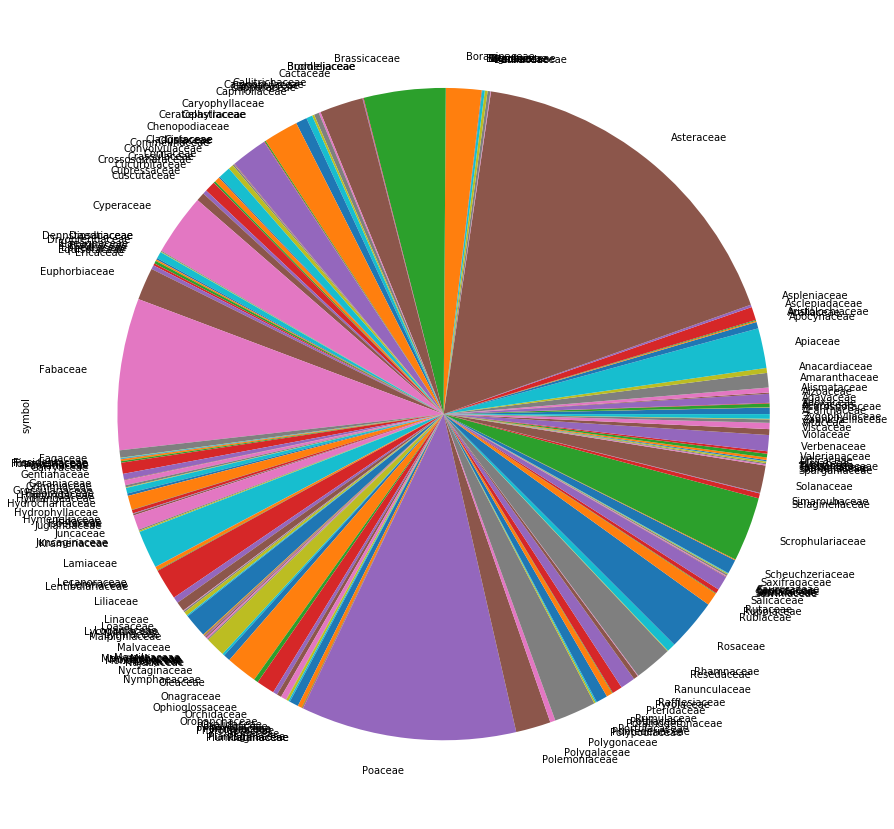

In [17]:
df.groupby('family')['symbol'].nunique().plot.pie( figsize=(15, 15))




Shows most frequent ones are Asteraceae, Poaceaem, Fabaceae families
We dont need to worry about the lest frequent ones and try understand their names!


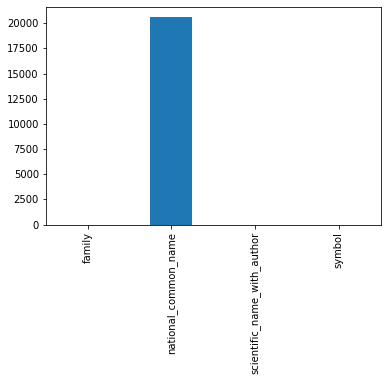

In [57]:
new_df.isna().sum().plot.bar()

In [19]:
mining_df = new_df.drop(columns=["scientific_name_with_author"])

mining_df = mining_df.fillna('no_common_name')
mining_df.to_csv('cleaned_dataset.csv')


We drop the column scientific_name_with_author since it may not be repeated
we dont drop common name since not having common name is also interesting!
We tried removing the symbol name and see the associations formed but it doesnt give many rules to mine
Hence we *discard* the idea

We also saw that mining the original dataframe and the dataframe without synonym symbol
gave the same association rules.

You can replace mining_df to df to verify that in the following snippets

Since the nan values are only in national_common_name column we replace it with
no_common_name while preprocessing.


### Predictive  and Part B


We take iris data set to do prediction using keras model

The accuracy can be bettered by increasing the number of epochs


In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# load dataset
iris = datasets.load_iris() 
# dataframe = pd.read_csv("iris.data", header=None)
dataframe =  pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
 
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

Using Theano backend.
/home/nitesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nitesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nitesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nitesh/anaconda3/lib/python3.7/site-packages/tensorflo

In [21]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=50, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)


In [22]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
#since epochs are less

Baseline: 28.00% (17.84%)


In [23]:

from apyori import apriori



We get the rows as item sets

To generate rules we use **aprori package** since it
allows us to use aditional interesting measure like lift
We have use Lift as additional measure for interesting rule mining.
We skiped the part of first minig all the rules and then minig interesting ones

In [24]:


data_list = []
for row in range(0, len(mining_df.index)):
    data_list.append([str(mining_df.values[row,column]) for column in range(0, len(mining_df.columns))])

algo = apriori(data_list[:20], min_support=0.2, min_confidence=0.2, min_lift=1, min_length=2)
results = list(algo)


In [25]:
print(len(data_list)) # printing

27098


In [26]:
print(results) ### not so Beautifully printed!!

[RelationRecord(items=frozenset({'Acanthaceae'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Acanthaceae'}), confidence=1.0, lift=1.0)]), RelationRecord(items=frozenset({'DIRE4'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'DIRE4'}), confidence=0.3, lift=1.0)]), RelationRecord(items=frozenset({'no_common_name'}), support=0.45, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'no_common_name'}), confidence=0.45, lift=1.0)]), RelationRecord(items=frozenset({'DIRE4', 'Acanthaceae'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'DIRE4', 'Acanthaceae'}), confidence=0.3, lift=1.0), OrderedStatistic(items_base=frozenset({'Acanthaceae'}), items_add=frozenset({'DIRE4'}), confidence=0.3, lift=1.0), OrderedStatistic(items_base=frozenset({'DIRE4'}), items_add=frozenset({'Acanthaceae'}), confidence=1.0, lift=1.0

In [27]:
## better printed
for i in range(0,len(results)):
    print(f"Required Association No. {i+1} is: {results[i]}")
    print('-'*25)

Required Association No. 1 is: RelationRecord(items=frozenset({'Acanthaceae'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Acanthaceae'}), confidence=1.0, lift=1.0)])
-------------------------
Required Association No. 2 is: RelationRecord(items=frozenset({'DIRE4'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'DIRE4'}), confidence=0.3, lift=1.0)])
-------------------------
Required Association No. 3 is: RelationRecord(items=frozenset({'no_common_name'}), support=0.45, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'no_common_name'}), confidence=0.45, lift=1.0)])
-------------------------
Required Association No. 4 is: RelationRecord(items=frozenset({'DIRE4', 'Acanthaceae'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'DIRE4', 'Acanthaceae'}), confidence=0.3, lift=1.0), OrderedStatistic(items_base=f


#### Understanding the above output

Considering the association **no. 4** from the above output, first, we have an association 
of Acanthaceae and DIRE4 and it is seen that these items are frequently together.
Then, the support value is given which is **0.3** and we have confidence and lift value 
for the itemsets one by one changing the order of the itemset. 
For example, **Confidence and Lift** measures for the likelihood of Family Acanthaceae if 
a symbol DIRE4 is used are are .3 and 1 respectively

The Confidence and Lift measures after changing the order are **1 and 1** respectively.




We now try getting the **MFI CFI** etc out of the item sets
We shall use **INSTA** Algo for the same

In [28]:

from fim import ista

##### Printing MFI using ISTA algo 

In [29]:


print  ('\nISTA supp=3, min_items_per_set=2')
for r in ista(data_list, supp=-3, zmin=2, target='m'):
    print(r)


ISTA supp=3, min_items_per_set=2
(('no_common_name', 'Asteraceae', 'CISC2'), 30)
(('no_common_name', 'Asteraceae', 'MAPIP4'), 29)
(('no_common_name', 'Asteraceae', 'PAST10'), 29)
(('no_common_name', 'Asteraceae', 'TAOFC'), 29)
(('no_common_name', 'Asteraceae', 'TAOFO'), 25)
(('no_common_name', 'Asteraceae', 'XASTC'), 21)
(('no_common_name', 'Asteraceae', 'ACMIO'), 20)
(('no_common_name', 'Asteraceae', 'ANPAF'), 17)
(('no_common_name', 'Asteraceae', 'ANROP'), 16)
(('no_common_name', 'Asteraceae', 'CHDOD'), 15)
(('no_common_name', 'Asteraceae', 'XASTG'), 15)
(('no_common_name', 'Asteraceae', 'SYFAC'), 13)
(('no_common_name', 'Asteraceae', 'ARLUL2'), 13)
(('no_common_name', 'Asteraceae', 'GUSA2'), 13)
(('no_common_name', 'Asteraceae', 'EUGRG'), 12)
(('no_common_name', 'Asteraceae', 'BREUC2'), 12)
(('no_common_name', 'Asteraceae', 'PAPA20'), 12)
(('no_common_name', 'Asteraceae', 'RUHIP'), 11)
(('no_common_name', 'Asteraceae', 'HESU3'), 11)
(('no_common_name', 'Asteraceae', 'SYSPS'), 11)
(

(('Nyctaginaceae', 'ALINI'), 3)
(('Nyctaginaceae', 'MICO15'), 3)
(('Nyctaginaceae', 'trailing windmills'), 3)
(('Solanaceae', 'longleaf groundcherry'), 3)
(('Solanaceae', 'PHSUN'), 3)
(('Solanaceae', 'Virginia groundcherry'), 3)
(('Solanaceae', 'QULO2'), 3)
(('Solanaceae', 'SAOR4'), 3)
(('Solanaceae', 'SODI'), 3)
(('Solanaceae', 'melonleaf nightshade'), 3)
(('Solanaceae', 'SORO'), 3)
(('Solanaceae', 'DAST'), 3)
(('Solanaceae', 'DAWR2'), 3)
(('Solanaceae', 'LYBA4'), 3)
(('Solanaceae', "Berlandier's wolfberry"), 3)
(('Solanaceae', 'MASO4'), 3)
(('Solanaceae', 'ivyleaf groundcherry'), 3)
(('Solanaceae', 'PHHEC'), 3)
(('Rubiaceae', 'GAPR'), 3)
(('Rubiaceae', 'HEGR17'), 3)
(('Rubiaceae', 'needleleaf bluet'), 3)
(('Rubiaceae', 'HOACA2'), 3)
(('Rubiaceae', 'HOHU'), 3)
(('Rubiaceae', 'HORU'), 3)
(('Rubiaceae', 'CRDI12'), 3)
(('Rubiaceae', 'poorjoe'), 3)
(('Rubiaceae', 'DITET'), 3)
(('Rubiaceae', 'GAMEA'), 3)
(('Gentianaceae', 'EUEXR'), 3)
(('Gentianaceae', 'CEAR12'), 3)
(('Gentianaceae', 'LORO

##### Printing CFI using ISTA algo 

In [30]:


print  ('\nISTA supp=3, min_items_per_set=2')
for r in ista(data_list, supp=-3, zmin=2, target='c'):
    print(r)


ISTA supp=3, min_items_per_set=2
(('no_common_name', 'Asteraceae', 'CISC2'), 30)
(('no_common_name', 'Asteraceae', 'MAPIP4'), 29)
(('no_common_name', 'Asteraceae', 'PAST10'), 29)
(('no_common_name', 'Asteraceae', 'TAOFC'), 29)
(('no_common_name', 'Asteraceae', 'TAOFO'), 25)
(('no_common_name', 'Asteraceae', 'XASTC'), 21)
(('no_common_name', 'Asteraceae', 'ACMIO'), 20)
(('no_common_name', 'Asteraceae', 'ANPAF'), 17)
(('no_common_name', 'Asteraceae', 'ANROP'), 16)
(('no_common_name', 'Asteraceae', 'CHDOD'), 15)
(('no_common_name', 'Asteraceae', 'XASTG'), 15)
(('no_common_name', 'Asteraceae', 'SYFAC'), 13)
(('no_common_name', 'Asteraceae', 'ARLUL2'), 13)
(('no_common_name', 'Asteraceae', 'GUSA2'), 13)
(('no_common_name', 'Asteraceae', 'EUGRG'), 12)
(('no_common_name', 'Asteraceae', 'BREUC2'), 12)
(('no_common_name', 'Asteraceae', 'PAPA20'), 12)
(('no_common_name', 'Asteraceae', 'RUHIP'), 11)
(('no_common_name', 'Asteraceae', 'HESU3'), 11)
(('no_common_name', 'Asteraceae', 'SYSPS'), 11)
(

(('Poaceae', 'GLST'), 7)
(('Poaceae', 'MUME2'), 7)
(('Poaceae', 'ACNED'), 7)
(('Poaceae', 'CAPUP7'), 7)
(('Poaceae', 'ELVIV'), 7)
(('Poaceae', 'AGST2'), 7)
(('Poaceae', 'DIACL'), 7)
(('Poaceae', 'DIACA'), 7)
(('Poaceae', 'PACA6'), 7)
(('Poaceae', 'URFU2'), 7)
(('Poaceae', 'VUMY'), 7)
(('Poaceae', 'VUOCG'), 7)
(('Poaceae', 'SEPUP2'), 7)
(('Poaceae', 'PSSPS'), 7)
(('Poaceae', 'SPPY2'), 6)
(('Poaceae', 'TRAE'), 6)
(('Poaceae', 'DACA3'), 6)
(('Poaceae', 'TRSP12'), 6)
(('Poaceae', 'ELELB2'), 6)
(('Poaceae', 'LECI4'), 6)
(('Poaceae', 'PHAU7'), 6)
(('Poaceae', 'MERE9'), 6)
(('Poaceae', 'SCPU'), 6)
(('Poaceae', 'SEPA10'), 6)
(('Poaceae', 'SEIT'), 6)
(('Poaceae', 'ERPI2'), 6)
(('Poaceae', 'ARPUN'), 6)
(('Poaceae', 'BESY'), 6)
(('Poaceae', 'BOBA3'), 6)
(('Poaceae', 'BOBL'), 6)
(('Poaceae', 'BRAR5'), 6)
(('Poaceae', 'BRCA5'), 6)
(('Poaceae', 'BRDIR'), 6)
(('Poaceae', 'AIEL4'), 6)
(('Poaceae', 'AGGI2'), 6)
(('Poaceae', 'CYDA'), 5)
(('Poaceae', 'SPCR'), 5)
(('Poaceae', 'SEVIV'), 5)
(('Poaceae', 'AE

(('Verbenaceae', 'GLPU4'), 3)
(('Verbenaceae', 'VEBR'), 3)
(('Verbenaceae', 'swamp verbena'), 3)
(('Saxifragaceae', 'SACAC4'), 9)
(('Saxifragaceae', 'SARH2'), 8)
(('Saxifragaceae', 'SACAM2'), 8)
(('Saxifragaceae', 'SAOC4'), 7)
(('Saxifragaceae', 'SAOD2'), 6)
(('Saxifragaceae', 'SARI8'), 6)
(('Saxifragaceae', 'littleleaf alumroot'), 5)
(('Saxifragaceae', 'HERUV'), 5)
(('Saxifragaceae', 'LITE4'), 5)
(('Saxifragaceae', 'SACH4'), 4)
(('Saxifragaceae', 'SABRA2'), 4)
(('Saxifragaceae', 'SAFLC'), 4)
(('Saxifragaceae', 'pink alumroot'), 3)
(('Saxifragaceae', 'tufted alpine saxifrage'), 3)
(('Saxifragaceae', 'SAHIH2'), 3)
(('Saxifragaceae', 'TEJA'), 3)
(('Juncaceae', 'JUARL'), 14)
(('Juncaceae', 'LUMUF'), 9)
(('Juncaceae', 'LUCO6'), 8)
(('Juncaceae', 'LUPA4'), 7)
(('Juncaceae', 'JUSA'), 6)
(('Juncaceae', 'JUDI'), 5)
(('Juncaceae', 'JUMA4'), 4)
(('Juncaceae', 'JUTE'), 4)
(('Juncaceae', 'JUDU2'), 3)
(('Juncaceae', 'chestnut rush'), 3)
(('Juncaceae', 'JUAL2'), 3)
(('Juncaceae', 'JUEFS'), 3)
(('Jun


We now try further to mine rules according to other interesting measures like
***confidence, lift, leverage, conviction, support.***


In [31]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import mlxtend
from mlxtend.frequent_patterns import apriori

In [32]:
te = TransactionEncoder()
te_ary = te.fit(data_list).transform(data_list[:20])
apr_df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = mlxtend.frequent_patterns.apriori(apr_df, min_support=0.1, use_colnames=True)


frequent_itemsets



support                              itemsets
0      0.10                               (ANTH2)
1      1.00                         (Acanthaceae)
2      0.10                               (CALI2)
3      0.30                               (DIRE4)
4      0.15                               (DYSCD)
5      0.45                      (no_common_name)
6      0.10                  (Acanthaceae, ANTH2)
7      0.10                  (Acanthaceae, CALI2)
8      0.30                  (DIRE4, Acanthaceae)
9      0.15                  (DYSCD, Acanthaceae)
10     0.45         (no_common_name, Acanthaceae)
11     0.25               (DIRE4, no_common_name)
12     0.10               (DYSCD, no_common_name)
13     0.25  (DIRE4, no_common_name, Acanthaceae)
14     0.10  (DYSCD, no_common_name, Acanthaceae)

the itemsets generated are from the same dataset, we use only some itemsets else no association are formed

###### Interesting rules based on interesting measure = leverage 


In [33]:

association_rules(frequent_itemsets, metric="leverage", min_threshold=0.1)

antecedents                    consequents  \
0                        (DIRE4)               (no_common_name)   
1               (no_common_name)                        (DIRE4)   
2           (DIRE4, Acanthaceae)               (no_common_name)   
3  (no_common_name, Acanthaceae)                        (DIRE4)   
4                        (DIRE4)  (no_common_name, Acanthaceae)   
5               (no_common_name)           (DIRE4, Acanthaceae)   

   antecedent support  consequent support  support  confidence      lift  \
0                0.30                0.45     0.25    0.833333  1.851852   
1                0.45                0.30     0.25    0.555556  1.851852   
2                0.30                0.45     0.25    0.833333  1.851852   
3                0.45                0.30     0.25    0.555556  1.851852   
4                0.30                0.45     0.25    0.833333  1.851852   
5                0.45                0.30     0.25    0.555556  1.851852   

   leverage  conviction  
0     0.115       3.300  
1     0.115       1.575  
2     0.115       3.300  
3     0.115       1.575  
4     0.115       3.300  
5     0.115       1.575

###### Interesting rules based on interesting measure = confidence

In [34]:


association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

antecedents                    consequents  \
0                         (ANTH2)                  (Acanthaceae)   
1                         (CALI2)                  (Acanthaceae)   
2                         (DIRE4)                  (Acanthaceae)   
3                   (Acanthaceae)                        (DIRE4)   
4                         (DYSCD)                  (Acanthaceae)   
5                (no_common_name)                  (Acanthaceae)   
6                   (Acanthaceae)               (no_common_name)   
7                         (DIRE4)               (no_common_name)   
8                (no_common_name)                        (DIRE4)   
9                         (DYSCD)               (no_common_name)   
10        (DIRE4, no_common_name)                  (Acanthaceae)   
11           (DIRE4, Acanthaceae)               (no_common_name)   
12  (no_common_name, Acanthaceae)                        (DIRE4)   
13                        (DIRE4)  (no_common_name, Acanthaceae)   
14               (no_common_name)           (DIRE4, Acanthaceae)   
15        (DYSCD, no_common_name)                  (Acanthaceae)   
16           (DYSCD, Acanthaceae)               (no_common_name)   
17                        (DYSCD)  (no_common_name, Acanthaceae)   

    antecedent support  consequent support  support  confidence      lift  \
0                 0.10                1.00     0.10    1.000000  1.000000   
1                 0.10                1.00     0.10    1.000000  1.000000   
2                 0.30                1.00     0.30    1.000000  1.000000   
3                 1.00                0.30     0.30    0.300000  1.000000   
4                 0.15                1.00     0.15    1.000000  1.000000   
5                 0.45                1.00     0.45    1.000000  1.000000   
6                 1.00                0.45     0.45    0.450000  1.000000   
7                 0.30                0.45     0.25    0.833333  1.851852   
8                 0.45                0.30     0.25    0.555556  1.851852   
9                 0.15                0.45     0.10    0.666667  1.481481   
10                0.25                1.00     0.25    1.000000  1.000000   
11                0.30                0.45     0.25    0.833333  1.851852   
12                0.45                0.30     0.25    0.555556  1.851852   
13                0.30                0.45     0.25    0.833333  1.851852   
14                0.45                0.30     0.25    0.555556  1.851852   
15                0.10                1.00     0.10    1.000000  1.000000   
16                0.15                0.45     0.10    0.666667  1.481481   
17                0.15                0.45     0.10    0.666667  1.481481   

    leverage  conviction  
0     0.0000         inf  
1     0.0000         inf  
2     0.0000         inf  
3     0.0000       1.000  
4     0.0000         inf  
5     0.0000         inf  
6     0.0000       1.000  
7     0.1150       3.300  
8     0.1150       1.575  
9     0.0325       1.650  
10    0.0000         inf  
11    0.1150       3.300  
12    0.1150       1.575  
13    0.1150       3.300  
14    0.1150       1.575  
15    0.0000         inf  
16    0.0325       1.650  
17    0.0325       1.650

###### Interesting rules based on interesting measure = support

In [35]:


association_rules(frequent_itemsets, metric="support", min_threshold=0.2)

antecedents                    consequents  \
0                         (DIRE4)                  (Acanthaceae)   
1                   (Acanthaceae)                        (DIRE4)   
2                (no_common_name)                  (Acanthaceae)   
3                   (Acanthaceae)               (no_common_name)   
4                         (DIRE4)               (no_common_name)   
5                (no_common_name)                        (DIRE4)   
6         (DIRE4, no_common_name)                  (Acanthaceae)   
7            (DIRE4, Acanthaceae)               (no_common_name)   
8   (no_common_name, Acanthaceae)                        (DIRE4)   
9                         (DIRE4)  (no_common_name, Acanthaceae)   
10               (no_common_name)           (DIRE4, Acanthaceae)   
11                  (Acanthaceae)        (DIRE4, no_common_name)   

    antecedent support  consequent support  support  confidence      lift  \
0                 0.30                1.00     0.30    1.000000  1.000000   
1                 1.00                0.30     0.30    0.300000  1.000000   
2                 0.45                1.00     0.45    1.000000  1.000000   
3                 1.00                0.45     0.45    0.450000  1.000000   
4                 0.30                0.45     0.25    0.833333  1.851852   
5                 0.45                0.30     0.25    0.555556  1.851852   
6                 0.25                1.00     0.25    1.000000  1.000000   
7                 0.30                0.45     0.25    0.833333  1.851852   
8                 0.45                0.30     0.25    0.555556  1.851852   
9                 0.30                0.45     0.25    0.833333  1.851852   
10                0.45                0.30     0.25    0.555556  1.851852   
11                1.00                0.25     0.25    0.250000  1.000000   

    leverage  conviction  
0      0.000         inf  
1      0.000       1.000  
2      0.000         inf  
3      0.000       1.000  
4      0.115       3.300  
5      0.115       1.575  
6      0.000         inf  
7      0.115       3.300  
8      0.115       1.575  
9      0.115       3.300  
10     0.115       1.575  
11     0.000       1.000

###### Interesting rules based on interesting measure = lift

In [36]:


association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)

antecedents                    consequents  \
0                         (DIRE4)               (no_common_name)   
1                (no_common_name)                        (DIRE4)   
2                         (DYSCD)               (no_common_name)   
3                (no_common_name)                        (DYSCD)   
4            (DIRE4, Acanthaceae)               (no_common_name)   
5   (no_common_name, Acanthaceae)                        (DIRE4)   
6                         (DIRE4)  (no_common_name, Acanthaceae)   
7                (no_common_name)           (DIRE4, Acanthaceae)   
8            (DYSCD, Acanthaceae)               (no_common_name)   
9   (no_common_name, Acanthaceae)                        (DYSCD)   
10                        (DYSCD)  (no_common_name, Acanthaceae)   
11               (no_common_name)           (DYSCD, Acanthaceae)   

    antecedent support  consequent support  support  confidence      lift  \
0                 0.30                0.45     0.25    0.833333  1.851852   
1                 0.45                0.30     0.25    0.555556  1.851852   
2                 0.15                0.45     0.10    0.666667  1.481481   
3                 0.45                0.15     0.10    0.222222  1.481481   
4                 0.30                0.45     0.25    0.833333  1.851852   
5                 0.45                0.30     0.25    0.555556  1.851852   
6                 0.30                0.45     0.25    0.833333  1.851852   
7                 0.45                0.30     0.25    0.555556  1.851852   
8                 0.15                0.45     0.10    0.666667  1.481481   
9                 0.45                0.15     0.10    0.222222  1.481481   
10                0.15                0.45     0.10    0.666667  1.481481   
11                0.45                0.15     0.10    0.222222  1.481481   

    leverage  conviction  
0     0.1150    3.300000  
1     0.1150    1.575000  
2     0.0325    1.650000  
3     0.0325    1.092857  
4     0.1150    3.300000  
5     0.1150    1.575000  
6     0.1150    3.300000  
7     0.1150    1.575000  
8     0.0325    1.650000  
9     0.0325    1.092857  
10    0.0325    1.650000  
11    0.0325    1.092857

###### Interesting rules based on interesting measure = conviction

In [37]:


association_rules(frequent_itemsets, metric="conviction", min_threshold=1.1)

antecedents                    consequents  \
0                         (ANTH2)                  (Acanthaceae)   
1                         (CALI2)                  (Acanthaceae)   
2                         (DIRE4)                  (Acanthaceae)   
3                         (DYSCD)                  (Acanthaceae)   
4                (no_common_name)                  (Acanthaceae)   
5                         (DIRE4)               (no_common_name)   
6                (no_common_name)                        (DIRE4)   
7                         (DYSCD)               (no_common_name)   
8         (DIRE4, no_common_name)                  (Acanthaceae)   
9            (DIRE4, Acanthaceae)               (no_common_name)   
10  (no_common_name, Acanthaceae)                        (DIRE4)   
11                        (DIRE4)  (no_common_name, Acanthaceae)   
12               (no_common_name)           (DIRE4, Acanthaceae)   
13        (DYSCD, no_common_name)                  (Acanthaceae)   
14           (DYSCD, Acanthaceae)               (no_common_name)   
15                        (DYSCD)  (no_common_name, Acanthaceae)   

    antecedent support  consequent support  support  confidence      lift  \
0                 0.10                1.00     0.10    1.000000  1.000000   
1                 0.10                1.00     0.10    1.000000  1.000000   
2                 0.30                1.00     0.30    1.000000  1.000000   
3                 0.15                1.00     0.15    1.000000  1.000000   
4                 0.45                1.00     0.45    1.000000  1.000000   
5                 0.30                0.45     0.25    0.833333  1.851852   
6                 0.45                0.30     0.25    0.555556  1.851852   
7                 0.15                0.45     0.10    0.666667  1.481481   
8                 0.25                1.00     0.25    1.000000  1.000000   
9                 0.30                0.45     0.25    0.833333  1.851852   
10                0.45                0.30     0.25    0.555556  1.851852   
11                0.30                0.45     0.25    0.833333  1.851852   
12                0.45                0.30     0.25    0.555556  1.851852   
13                0.10                1.00     0.10    1.000000  1.000000   
14                0.15                0.45     0.10    0.666667  1.481481   
15                0.15                0.45     0.10    0.666667  1.481481   

    leverage  conviction  
0     0.0000         inf  
1     0.0000         inf  
2     0.0000         inf  
3     0.0000         inf  
4     0.0000         inf  
5     0.1150       3.300  
6     0.1150       1.575  
7     0.0325       1.650  
8     0.0000         inf  
9     0.1150       3.300  
10    0.1150       1.575  
11    0.1150       3.300  
12    0.1150       1.575  
13    0.0000         inf  
14    0.0325       1.650  
15    0.0325       1.650

In [38]:
def get_transactions(dataset):
        in_file = open(dataset, "r")
        if_lines = in_file.readlines()
        transactions = []
        for lines in if_lines[1:50]:
            string_lines = lines.split('')
#             int_lines = list(map(int, string_lines))
#             int_lines.sort()
            # order_set = OrderedSet(string_lines)
            transactions.append(string_lines)
        
        return transactions

### PART C



We will be using **IRIS DATA** Set to test drive
Decision Tree Classifier and 
Naive Bayesian Classifier


We use the output of the DTC to plot a 
Confusion Matrix

We use accuracy as the parameter to evaluate
the performance of the classifiers.







In [39]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=17)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [40]:
clf = tree.DecisionTreeClassifier(random_state=17)
clf = clf.fit(X_train, y_train)

In [41]:
y_pred = clf.predict(X_test)

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

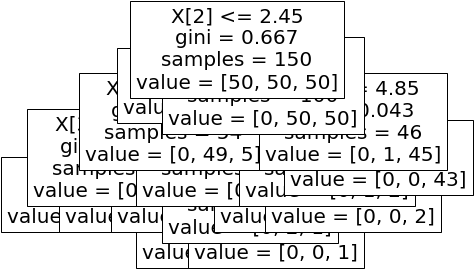

In [42]:
tree.plot_tree(clf.fit(iris.data, iris.target),  fontsize=20)

In [43]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.96      0.93      0.94        27
   virginica       0.89      0.94      0.92        18

    accuracy                           0.95        60
   macro avg       0.95      0.96      0.95        60
weighted avg       0.95      0.95      0.95        60



In [44]:
cm = confusion_matrix(y_test, y_pred)

In [45]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

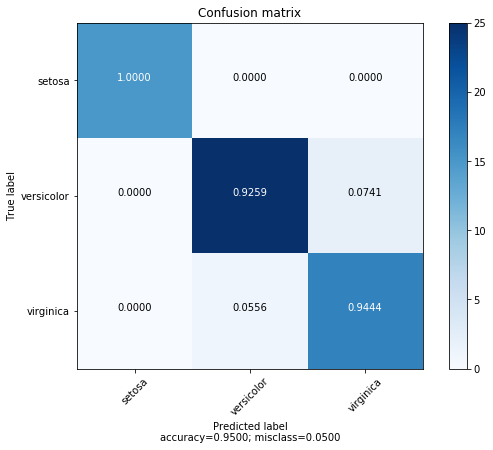

In [46]:
plot_confusion_matrix(cm, ['setosa','versicolor', 'virginica'])

In [47]:
from sklearn.naive_bayes import GaussianNB


In [48]:
clf2 = GaussianNB()

In [49]:
clf2.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

**Prediction Probability**

In [50]:
pred_clf = clf2.predict(X_test)


prob_pos_clf = clf2.predict_proba(X_test)[:, 1]

Create the prediction file by concatenation of the original data and predictions


Reshaping needed to perform the concatenation

In [51]:

pred_clf_df = pd.DataFrame(pred_clf.reshape(60,1))
#Column renaming to indicate the predictions
pred_clf_df.rename(columns={0:'Prediction'}, inplace=True)

In [52]:
#reshaping the test dataset
X_test_df = pd.DataFrame(X_test.reshape(60,4))

#concatenating the two pandas dataframes over the columns to create a prediction dataset
pred_outcome = pd.concat([X_test_df, pred_clf_df], axis=1, join_axes=[X_test_df.index])

pred_outcome.rename(columns = {0:'SepalLengthCm', 1:'SepalWidthCm', 2:'PetalLengthCm', 3:'PetalWidthCm'}, inplace=True)

/home/nitesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """


In [53]:
# Test options and evaluation metric
scoring = 'accuracy'
pred_outcome.head()


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Prediction
0      -0.506491      1.763528      -1.251767     -0.943766           0
1       0.155749     -0.369772       0.447945      0.434300           1
2       0.928362     -0.156442       0.819757      1.436529           2
3      -0.175371     -0.583102       0.235481      0.183742           1
4       0.376496     -0.583102       0.607293      0.810136           2

In [54]:
kfold = model_selection.KFold(n_splits=10, random_state=7)

#calling the cross validation function
cv_results = model_selection.cross_val_score(GaussianNB(), X_train, y_train, cv=kfold, scoring=scoring)

In [55]:
msg = "%s: %f (%f)" % ('NB accuracy', cv_results.mean(), cv_results.std())
print(msg)


NB accuracy: 0.955556 (0.054433)


We conclude that since both classfiers give the same accuracy of this test